In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
### Importing the dataset
d = []
d = pd.read_csv('dataset.csv')
ICD10_dataset = d

## initialize df equal to dataset
ICD10_dataset = ICD10_dataset.sort_values(by=['Participant ID'])




# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_ICD10_dataset = {}
row_counts_ICD10_dataset = {}
nan_counts_ICD10_dataset = {}
empty_counts_ICD10_dataset = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_ICD10_dataset in ICD10_dataset.columns:
    unique_count_ICD10_dataset = ICD10_dataset[column_ICD10_dataset].nunique()
    row_count_ICD10_dataset = len(ICD10_dataset[column_ICD10_dataset])
    nan_count_ICD10_dataset = ICD10_dataset[column_ICD10_dataset].isna().sum()  # Count NaN values
    empty_count_ICD10_dataset = ICD10_dataset[column_ICD10_dataset].eq('').sum()  # Count empty string values

    unique_counts_ICD10_dataset[column_ICD10_dataset] = [unique_count_ICD10_dataset]
    row_counts_ICD10_dataset[column_ICD10_dataset] = [row_count_ICD10_dataset]
    nan_counts_ICD10_dataset[column_ICD10_dataset] = [nan_count_ICD10_dataset]
    empty_counts_ICD10_dataset[column_ICD10_dataset] = [empty_count_ICD10_dataset]

# Create DataFrames from the dictionaries
unique_counts_ICD10_databank = []
row_counts_ICD10_databank = []
nan_counts_ICD10_databank = []
empty_counts_ICD10_databank = []

unique_counts_ICD10_databank = pd.DataFrame(unique_counts_ICD10_dataset, index=['Unique Count'])
row_counts_ICD10_databank = pd.DataFrame(row_counts_ICD10_dataset, index=['Row Count'])
nan_counts_ICD10_databank = pd.DataFrame(nan_counts_ICD10_dataset, index=['NaN Count'])
empty_counts_ICD10_databank = pd.DataFrame(empty_counts_ICD10_dataset, index=['Empty Count'])

# Concatenate the DataFrames
result_ICD10_dataset = []
result_ICD10_dataset = pd.concat([unique_counts_ICD10_databank, row_counts_ICD10_databank, nan_counts_ICD10_databank, empty_counts_ICD10_databank])

# Display the combined DataFrame
print("ICD10-base Clinal Dataset:")
print()
display(result_ICD10_dataset)



ICD10_dataset.head(3)

In [ ]:
#### Create a new DataFrame to store the modified data
Storing_ICD10_Codes_Dates_Table = []
ICD10_Codes_Dates_Table = ICD10_dataset

#### Iterate through each row
for idx, row in ICD10_Codes_Dates_Table.iterrows():
    participant_id = row['Participant ID']
    year_of_birth = row['Year of Birth']
    month_of_birth = row['Month of Birth']
    ethnicity = row['Ethnicity']
    sex = row['Sex']
    icd_names = row['ICD10 - Diagnosis'].split('|')
    dates = [row['ICD10 date-0'], row['ICD10 date-1'], row['ICD10 date-2'],
             row['ICD10 date-3'], row['ICD10 date-4'], row['ICD10 date-5'],
             row['ICD10 date-6'], row['ICD10 date-7'], row['ICD10 date-8'],
             row['ICD10 date-9'], row['ICD10 date-10'], row['ICD10 date-11'],
             row['ICD10 date-12'], row['ICD10 date-13'], row['ICD10 date-14'],
             row['ICD10 date-15'], row['ICD10 date-16'], row['ICD10 date-17'],
             row['ICD10 date-18'], row['ICD10 date-19'], row['ICD10 date-20'],
             row['ICD10 date-21'], row['ICD10 date-22'], row['ICD10 date-23'],
             row['ICD10 date-24'], row['ICD10 date-25'], row['ICD10 date-26'],
             row['ICD10 date-27'], row['ICD10 date-28'], row['ICD10 date-29'],
             row['ICD10 date-30'], row['ICD10 date-31'], row['ICD10 date-32'],
             row['ICD10 date-33'], row['ICD10 date-34'], row['ICD10 date-35'],
             row['ICD10 date-36'], row['ICD10 date-37'], row['ICD10 date-38'],
             row['ICD10 date-39'], row['ICD10 date-40'], row['ICD10 date-41'],
             row['ICD10 date-42'], row['ICD10 date-43'], row['ICD10 date-44'],
             row['ICD10 date-45'], row['ICD10 date-46'], row['ICD10 date-47'],
             row['ICD10 date-48'], row['ICD10 date-49'], row['ICD10 date-50'],
             row['ICD10 date-51'], row['ICD10 date-52'], row['ICD10 date-53'],
             row['ICD10 date-54'], row['ICD10 date-55'], row['ICD10 date-56'],
             row['ICD10 date-57'], row['ICD10 date-58'], row['ICD10 date-59'],
             row['ICD10 date-60'], row['ICD10 date-61'], row['ICD10 date-62'],
             row['ICD10 date-63'], row['ICD10 date-64'], row['ICD10 date-65'],
             row['ICD10 date-66'], row['ICD10 date-67'], row['ICD10 date-68'],
             row['ICD10 date-69'], row['ICD10 date-70'], row['ICD10 date-71'],
             row['ICD10 date-72'], row['ICD10 date-73'], row['ICD10 date-74'],
             row['ICD10 date-75'], row['ICD10 date-76'], row['ICD10 date-77'],
             row['ICD10 date-78'], row['ICD10 date-79'], row['ICD10 date-80'],
             row['ICD10 date-81'], row['ICD10 date-82'],row['ICD10 date-83'],
             row['ICD10 date-84'], row['ICD10 date-85'],row['ICD10 date-86'],
             row['ICD10 date-87'], row['ICD10 date-88'],row['ICD10 date-89'], row['ICD10 date-90'],
             row['ICD10 date-91'], row['ICD10 date-92'],row['ICD10 date-93'],
             row['ICD10 date-94'], row['ICD10 date-95'],row['ICD10 date-96'],
             row['ICD10 date-97'], row['ICD10 date-98'],row['ICD10 date-99'], row['ICD10 date-100'],
             row['ICD10 date-101'], row['ICD10 date-102'],
             row['ICD10 date-103'], row['ICD10 date-104'], row['ICD10 date-105'],
             row['ICD10 date-106'], row['ICD10 date-107'], row['ICD10 date-108'],
             row['ICD10 date-109'], row['ICD10 date-110'], row['ICD10 date-111'],
             row['ICD10 date-112'], row['ICD10 date-113'], row['ICD10 date-114'],
             row['ICD10 date-115'], row['ICD10 date-116'], row['ICD10 date-117'],
             row['ICD10 date-118'], row['ICD10 date-119'], row['ICD10 date-120'],
             row['ICD10 date-121'], row['ICD10 date-122'], row['ICD10 date-123'],
             row['ICD10 date-124'], row['ICD10 date-125'], row['ICD10 date-126'],
             row['ICD10 date-127'], row['ICD10 date-128'], row['ICD10 date-129'],
             row['ICD10 date-130'], row['ICD10 date-131'], row['ICD10 date-132'],
             row['ICD10 date-133'], row['ICD10 date-134'], row['ICD10 date-135'],
             row['ICD10 date-136'], row['ICD10 date-137'], row['ICD10 date-138'],
             row['ICD10 date-139'], row['ICD10 date-140'], row['ICD10 date-141'],
             row['ICD10 date-142'], row['ICD10 date-143'], row['ICD10 date-144'],
             row['ICD10 date-145'], row['ICD10 date-146'], row['ICD10 date-147'],
             row['ICD10 date-148'], row['ICD10 date-149'], row['ICD10 date-150'],
             row['ICD10 date-151'], row['ICD10 date-152'], row['ICD10 date-153'],
             row['ICD10 date-154'], row['ICD10 date-155'], row['ICD10 date-156'],
             row['ICD10 date-157'], row['ICD10 date-158'], row['ICD10 date-159'],
             row['ICD10 date-160'], row['ICD10 date-161'], row['ICD10 date-162'],
             row['ICD10 date-163'], row['ICD10 date-164'], row['ICD10 date-165'],
             row['ICD10 date-166'], row['ICD10 date-167'], row['ICD10 date-168'],
             row['ICD10 date-169'], row['ICD10 date-170'], row['ICD10 date-171'],
             row['ICD10 date-172'], row['ICD10 date-173'], row['ICD10 date-174'],
             row['ICD10 date-175'], row['ICD10 date-176'], row['ICD10 date-177'],
             row['ICD10 date-178'], row['ICD10 date-179'], row['ICD10 date-180'],
             row['ICD10 date-181'], row['ICD10 date-182'],row['ICD10 date-183'],
             row['ICD10 date-184'], row['ICD10 date-185'],row['ICD10 date-186'],
             row['ICD10 date-187'], row['ICD10 date-188'],row['ICD10 date-189'], row['ICD10 date-190'],
             row['ICD10 date-191'], row['ICD10 date-192'],row['ICD10 date-193'],
             row['ICD10 date-194'], row['ICD10 date-195'],row['ICD10 date-196'],
             row['ICD10 date-197'], row['ICD10 date-198'],row['ICD10 date-199'], row['ICD10 date-200'],
             row['ICD10 date-201'], row['ICD10 date-202'],
             row['ICD10 date-203'], row['ICD10 date-204'], row['ICD10 date-205'],
             row['ICD10 date-206'], row['ICD10 date-207'], row['ICD10 date-208'],
             row['ICD10 date-209'], row['ICD10 date-210'], row['ICD10 date-211'],
             row['ICD10 date-212'], row['ICD10 date-213'], row['ICD10 date-214'],
             row['ICD10 date-215'], row['ICD10 date-216'], row['ICD10 date-217'],
             row['ICD10 date-218'], row['ICD10 date-219'], row['ICD10 date-220'],
             row['ICD10 date-221'], row['ICD10 date-222'], row['ICD10 date-223'],
             row['ICD10 date-224'], row['ICD10 date-225'], row['ICD10 date-226'],
             row['ICD10 date-227'], row['ICD10 date-228'], row['ICD10 date-229'],
             row['ICD10 date-230'], row['ICD10 date-231'], row['ICD10 date-232'],
             row['ICD10 date-233'], row['ICD10 date-234'], row['ICD10 date-235'],
             row['ICD10 date-236'], row['ICD10 date-237'], row['ICD10 date-238'],
             row['ICD10 date-239'], row['ICD10 date-240'], row['ICD10 date-241'],
             row['ICD10 date-242']]

    for i in range(243):
        new_row = [participant_id,year_of_birth,month_of_birth,ethnicity,sex, icd_names[i] if len(icd_names) > i else None, dates[i]]
        Storing_ICD10_Codes_Dates_Table.append(new_row)

#### Create a new DataFrame with the modified data
ICD10_Codes_Dates_dataset = []
ICD10_Codes_Dates_dataset = pd.DataFrame(Storing_ICD10_Codes_Dates_Table, columns=['Participant ID','Year of Birth','Month of Birth','Ethnicity','Sex','ICD10 codes with Diseases Names', 'ICD10 Diagnosis Date'])
#### Remove rows with NaN values in both columns
ICD10_Codes_Dates_dataset = ICD10_Codes_Dates_dataset.dropna(subset=['ICD10 codes with Diseases Names', 'ICD10 Diagnosis Date'])
ICD10_Codes_Dates_dataset


#### Reset the index after dropping rows
ICD10_Codes_Dates_dataset.reset_index(drop=True, inplace=True)
Organised_ICD10_Codes_Dates_Table = []
Organised_ICD10_Codes_Dates_Table = ICD10_Codes_Dates_dataset




# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_Organised_ICD10_Codes_Dates_Table = {}
row_counts_Organised_ICD10_Codes_Dates_Table = {}
nan_counts_Organised_ICD10_Codes_Dates_Table = {}
empty_counts_Organised_ICD10_Codes_Dates_Table = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_Organised_ICD10_Codes_Dates_Table in Organised_ICD10_Codes_Dates_Table.columns:
    unique_count_Organised_ICD10_Codes_Dates_Table = Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table].nunique()
    row_count_Organised_ICD10_Codes_Dates_Table = len(Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table])
    nan_count_Organised_ICD10_Codes_Dates_Table = Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table].isna().sum()  # Count NaN values
    empty_count_Organised_ICD10_Codes_Dates_Table = Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table].eq('').sum()  # Count empty string values

    unique_counts_Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table] = [unique_count_Organised_ICD10_Codes_Dates_Table]
    row_counts_Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table] = [row_count_Organised_ICD10_Codes_Dates_Table]
    nan_counts_Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table] = [nan_count_Organised_ICD10_Codes_Dates_Table]
    empty_counts_Organised_ICD10_Codes_Dates_Table[column_Organised_ICD10_Codes_Dates_Table] = [empty_count_Organised_ICD10_Codes_Dates_Table]

# Create DataFrames from the dictionaries
unique_counts_Organised_ICD10_Codes_Dates_Table_databank = []
row_counts_Organised_ICD10_Codes_Dates_Table_databank = []
nan_counts_Organised_ICD10_ICD10_Codes_Dates_Table_databank = []
empty_counts_Organised_ICD10_ICD10_Codes_Dates_Table_databank = []

unique_counts_Organised_ICD10_Codes_Dates_Table_databank = pd.DataFrame(unique_counts_Organised_ICD10_Codes_Dates_Table, index=['Unique Count'])
row_counts_Organised_ICD10_Codes_Dates_Table_databank = pd.DataFrame(row_counts_Organised_ICD10_Codes_Dates_Table, index=['Row Count'])
nan_counts_Organised_ICD10_Codes_Dates_Table_databank = pd.DataFrame(nan_counts_Organised_ICD10_Codes_Dates_Table, index=['NaN Count'])
empty_counts_Organised_ICD10_Codes_Dates_Table_databank = pd.DataFrame(empty_counts_Organised_ICD10_Codes_Dates_Table, index=['Empty Count'])

# Concatenate the DataFrames
result_Organised_ICD10_Codes_Dates_Table = []
result_Organised_ICD10_Codes_Dates_Table = pd.concat([unique_counts_Organised_ICD10_Codes_Dates_Table_databank, row_counts_Organised_ICD10_Codes_Dates_Table_databank, nan_counts_Organised_ICD10_Codes_Dates_Table_databank, empty_counts_Organised_ICD10_Codes_Dates_Table_databank])

# Display the combined DataFrame
print("Organised ICD10 Codes with Dates Table:")
print()
display(result_Organised_ICD10_Codes_Dates_Table)








### Seperate the ICD10 Codes and ICD10 Diseases columns
Organised_ICD10_Codes_Dates_dataset = []
Organised_ICD10_Codes_Dates_dataset = Organised_ICD10_Codes_Dates_Table
Organised_ICD10_Codes_Dates_dataset['ICD10 codes'] = Organised_ICD10_Codes_Dates_dataset['ICD10 codes with Diseases Names'].str.extract(r'([A-Z]\d+\.\d+|[A-Z]\d+)')  # Handles both cases
Organised_ICD10_Codes_Dates_dataset['ICD10 Diseases'] = Organised_ICD10_Codes_Dates_dataset['ICD10 codes with Diseases Names'].str.replace(r'[A-Z]\d+\.\d+|[A-Z]\d+', '')
Organised_ICD10_Codes_Dates_dataset = Organised_ICD10_Codes_Dates_dataset.drop(columns=['ICD10 codes with Diseases Names'])
Organised_ICD10_Codes_Dates_dataset = Organised_ICD10_Codes_Dates_dataset.sort_values(by=['Participant ID'])


ICD10_Codes_Dates_dataset.head(3)

In [ ]:
#### initialize df1 as ICD10 codes dataset
Main_ICD10_Codes_Dates_Table = []
Main_ICD10_Codes_Dates_Table = ICD10_dataset.iloc[:, :5].join(ICD10_dataset.iloc[:, 249:329])
Main_ICD10_Codes_Dates_Table  = Main_ICD10_Codes_Dates_Table .dropna(subset=['Main ICD10 - Diagnosis'])





# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_Main_ICD10_Codes_Dates_Table = {}
row_counts_Main_ICD10_Codes_Dates_Table = {}
nan_counts_Main_ICD10_Codes_Dates_Table = {}
empty_counts_Main_ICD10_Codes_Dates_Table = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_Main_ICD10_Codes_Dates_Table in Main_ICD10_Codes_Dates_Table.columns:
    unique_count_Main_ICD10_Codes_Dates_Table = Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table].nunique()
    row_count_Main_ICD10_Codes_Dates_Table = len(Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table])
    nan_count_Main_ICD10_Codes_Dates_Table = Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table].isna().sum()  # Count NaN values
    empty_count_Main_ICD10_Codes_Dates_Table = Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table].eq('').sum()  # Count empty string values

    unique_counts_Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table] = [unique_count_Main_ICD10_Codes_Dates_Table]
    row_counts_Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table] = [row_count_Main_ICD10_Codes_Dates_Table]
    nan_counts_Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table] = [nan_count_Main_ICD10_Codes_Dates_Table]
    empty_counts_Main_ICD10_Codes_Dates_Table[column_Main_ICD10_Codes_Dates_Table] = [empty_count_Main_ICD10_Codes_Dates_Table]

# Create DataFrames from the dictionaries
unique_counts_Main_ICD10_Codes_Dates_Table_databank = []
row_counts_Main_ICD10_Codes_Dates_Table_databank = []
nan_counts_Main_ICD10_ICD10_Codes_Dates_Table_databank = []
empty_counts_Main_ICD10_ICD10_Codes_Dates_Table_databank = []

unique_counts_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(unique_counts_Main_ICD10_Codes_Dates_Table, index=['Unique Count'])
row_counts_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(row_counts_Main_ICD10_Codes_Dates_Table, index=['Row Count'])
nan_counts_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(nan_counts_Main_ICD10_Codes_Dates_Table, index=['NaN Count'])
empty_counts_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(empty_counts_Main_ICD10_Codes_Dates_Table, index=['Empty Count'])

# Concatenate the DataFrames
result_Main_ICD10_Codes_Dates_Table = []
result_Main_ICD10_Codes_Dates_Table = pd.concat([unique_counts_Main_ICD10_Codes_Dates_Table_databank, row_counts_Main_ICD10_Codes_Dates_Table_databank, nan_counts_Main_ICD10_Codes_Dates_Table_databank, empty_counts_Main_ICD10_Codes_Dates_Table_databank])

# Display the combined DataFrame
print("Main ICD10 Codes with Dates Table:")
print()
display(result_Main_ICD10_Codes_Dates_Table)







Main_ICD10_Codes_Dates_Table.head(3)

In [ ]:
#### Create a new DataFrame to store the modified data
Storing_Main_ICD10_Codes_Dates_Table = []

#### Iterate through each row
for idx_Main, row in Main_ICD10_Codes_Dates_Table.iterrows():
    participant_id_Main = row['Participant ID']
    year_of_birth_Main = row['Year of Birth']
    month_of_birth_Main = row['Month of Birth']
    ethnicity_Main = row['Ethnicity']
    sex_Main = row['Sex']
    icd_names_Main = row['Main ICD10 - Diagnosis'].split('|')
    dates_Main = [row['Main ICD10 date-0'], row['Main ICD10 date-1'], row['Main ICD10 date-2'],
             row['Main ICD10 date-3'], row['Main ICD10 date-4'], row['Main ICD10 date-5'],
             row['Main ICD10 date-6'], row['Main ICD10 date-7'], row['Main ICD10 date-8'],
             row['Main ICD10 date-9'], row['Main ICD10 date-10'], row['Main ICD10 date-11'],
             row['Main ICD10 date-12'], row['Main ICD10 date-13'], row['Main ICD10 date-14'],
             row['Main ICD10 date-15'], row['Main ICD10 date-16'], row['Main ICD10 date-17'],
             row['Main ICD10 date-18'], row['Main ICD10 date-19'], row['Main ICD10 date-20'],
             row['Main ICD10 date-21'], row['Main ICD10 date-22'], row['Main ICD10 date-23'],
             row['Main ICD10 date-24'], row['Main ICD10 date-25'], row['Main ICD10 date-26'],
             row['Main ICD10 date-27'], row['Main ICD10 date-28'], row['Main ICD10 date-29'],
             row['Main ICD10 date-30'], row['Main ICD10 date-31'], row['Main ICD10 date-32'],
             row['Main ICD10 date-33'], row['Main ICD10 date-34'], row['Main ICD10 date-35'],
             row['Main ICD10 date-36'], row['Main ICD10 date-37'], row['Main ICD10 date-38'],
             row['Main ICD10 date-39'], row['Main ICD10 date-40'], row['Main ICD10 date-41'],
             row['Main ICD10 date-42'], row['Main ICD10 date-43'], row['Main ICD10 date-44'],
             row['Main ICD10 date-45'], row['Main ICD10 date-46'], row['Main ICD10 date-47'],
             row['Main ICD10 date-48'], row['Main ICD10 date-49'], row['Main ICD10 date-50'],
             row['Main ICD10 date-51'], row['Main ICD10 date-52'], row['Main ICD10 date-53'],
             row['Main ICD10 date-54'], row['Main ICD10 date-55'], row['Main ICD10 date-56'],
             row['Main ICD10 date-57'], row['Main ICD10 date-58'], row['Main ICD10 date-59'],
             row['Main ICD10 date-60'], row['Main ICD10 date-61'], row['Main ICD10 date-62'],
             row['Main ICD10 date-63'], row['Main ICD10 date-64'], row['Main ICD10 date-65'],
             row['Main ICD10 date-66'], row['Main ICD10 date-67'], row['Main ICD10 date-68'],
             row['Main ICD10 date-69'], row['Main ICD10 date-70'], row['Main ICD10 date-71'],
             row['Main ICD10 date-72'], row['Main ICD10 date-73'], row['Main ICD10 date-74'],
             row['Main ICD10 date-75'], row['Main ICD10 date-76'], row['Main ICD10 date-77'],
             row['Main ICD10 date-78']]


    for i in range(79):
        new_row_Main = [participant_id_Main,year_of_birth_Main,month_of_birth_Main,ethnicity_Main,sex_Main, icd_names_Main[i] if len(icd_names_Main) > i else None, dates_Main[i]]
        Storing_Main_ICD10_Codes_Dates_Table.append(new_row_Main)

#### Create a new DataFrame with the modified data
Main_ICD10_Codes_Dates_dataset = []
Main_ICD10_Codes_Dates_dataset = pd.DataFrame(Storing_Main_ICD10_Codes_Dates_Table, columns=['Participant ID','Year of Birth','Month of Birth','Ethnicity','Sex','Main ICD10 codes with Diseases Names', 'Main ICD10 Diagnosis Date'])
### Remove rows with NaN values in both columns
Main_ICD10_Codes_Dates_dataset = Main_ICD10_Codes_Dates_dataset.dropna(subset=['Main ICD10 codes with Diseases Names', 'Main ICD10 Diagnosis Date'])
Main_ICD10_Codes_Dates_dataset


#### Reset the index after dropping rows
Main_ICD10_Codes_Dates_dataset.reset_index(drop=True, inplace=True)
Main_ICD10_Codes_Dates_dataset





Organised_Main_ICD10_Codes_Dates_Table = []
Organised_Main_ICD10_Codes_Dates_Table = Main_ICD10_Codes_Dates_dataset




# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_Organised_Main_ICD10_Codes_Dates_Table = {}
row_counts_Organised_Main_ICD10_Codes_Dates_Table = {}
nan_counts_Organised_Main_ICD10_Codes_Dates_Table = {}
empty_counts_Organised_Main_ICD10_Codes_Dates_Table = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_Organised_Main_ICD10_Codes_Dates_Table in Organised_Main_ICD10_Codes_Dates_Table.columns:
    unique_count_Organised_Main_ICD10_Codes_Dates_Table = Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table].nunique()
    row_count_Organised_Main_ICD10_Codes_Dates_Table = len(Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table])
    nan_count_Organised_Main_ICD10_Codes_Dates_Table = Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table].isna().sum()  # Count NaN values
    empty_count_Organised_Main_ICD10_Codes_Dates_Table = Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table].eq('').sum()  # Count empty string values

    unique_counts_Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table] = [unique_count_Organised_Main_ICD10_Codes_Dates_Table]
    row_counts_Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table] = [row_count_Organised_Main_ICD10_Codes_Dates_Table]
    nan_counts_Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table] = [nan_count_Organised_Main_ICD10_Codes_Dates_Table]
    empty_counts_Organised_Main_ICD10_Codes_Dates_Table[column_Organised_Main_ICD10_Codes_Dates_Table] = [empty_count_Organised_Main_ICD10_Codes_Dates_Table]

# Create DataFrames from the dictionaries
unique_counts_Organised_Main_ICD10_Codes_Dates_Table_databank = []
row_counts_Organised_Main_ICD10_Codes_Dates_Table_databank = []
nan_counts_Organised_Main_ICD10_ICD10_Codes_Dates_Table_databank = []
empty_counts_Organised_Main_ICD10_ICD10_Codes_Dates_Table_databank = []

unique_counts_Organised_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(unique_counts_Organised_Main_ICD10_Codes_Dates_Table, index=['Unique Count'])
row_counts_Organised_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(row_counts_Organised_Main_ICD10_Codes_Dates_Table, index=['Row Count'])
nan_counts_Organised_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(nan_counts_Organised_Main_ICD10_Codes_Dates_Table, index=['NaN Count'])
empty_counts_Organised_Main_ICD10_Codes_Dates_Table_databank = pd.DataFrame(empty_counts_Organised_Main_ICD10_Codes_Dates_Table, index=['Empty Count'])

# Concatenate the DataFrames
result_Organised_Main_ICD10_Codes_Dates_Table = []
result_Organised_Main_ICD10_Codes_Dates_Table = pd.concat([unique_counts_Organised_Main_ICD10_Codes_Dates_Table_databank, row_counts_Organised_Main_ICD10_Codes_Dates_Table_databank, nan_counts_Organised_Main_ICD10_Codes_Dates_Table_databank, empty_counts_Organised_Main_ICD10_Codes_Dates_Table_databank])

# Display the combined DataFrame
print("Organised Main ICD10 Codes with Dates Table:")
print()
display(result_Organised_Main_ICD10_Codes_Dates_Table)







#### Seperate the Main ICD10 Codes and Main ICD10 Diseases columns
Organised_Main_ICD10_Codes_Dates_dataset = []
Organised_Main_ICD10_Codes_Dates_dataset = Organised_Main_ICD10_Codes_Dates_Table

Organised_Main_ICD10_Codes_Dates_dataset['Main ICD10 codes'] = Organised_Main_ICD10_Codes_Dates_dataset['Main ICD10 codes with Diseases Names'].str.extract(r'([A-Z]\d+\.\d+|[A-Z]\d+)')  # Handles both cases
Organised_Main_ICD10_Codes_Dates_dataset['Main ICD10 Diseases'] = Organised_Main_ICD10_Codes_Dates_dataset['Main ICD10 codes with Diseases Names'].str.replace(r'[A-Z]\d+\.\d+|[A-Z]\d+', '')
Organised_Main_ICD10_Codes_Dates_dataset = Organised_Main_ICD10_Codes_Dates_dataset.drop(columns=['Main ICD10 codes with Diseases Names'])
Organised_Main_ICD10_Codes_Dates_dataset = Organised_Main_ICD10_Codes_Dates_dataset.sort_values(by=['Participant ID'])


Main_ICD10_Codes_Dates_dataset.head(3)

In [ ]:
### Concentenate (combine) ICD10 codes dataset  and Main ICD10 codes dataset
data_table = []
data_table = pd.concat([Organised_ICD10_Codes_Dates_dataset ,Organised_Main_ICD10_Codes_Dates_dataset])
data_table = data_table.sort_values(by='Participant ID')
data_table.fillna('', inplace=True)




# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_data_table = {}
row_counts_data_table= {}
nan_counts_data_table = {}
empty_counts_data_table = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_data_table in data_table.columns:
    unique_count_data_table = data_table[column_data_table].nunique()
    row_count_data_table = len(data_table[column_data_table])
    nan_count_data_table = data_table[column_data_table].isna().sum()  # Count NaN values
    empty_count_data_table = data_table[column_data_table].eq('').sum()  # Count empty string values

    unique_counts_data_table[column_data_table] = [unique_count_data_table]
    row_counts_data_table[column_data_table] = [row_count_data_table]
    nan_counts_data_table[column_data_table] = [nan_count_data_table]
    empty_counts_data_table[column_data_table] = [empty_count_data_table]

# Create DataFrames from the dictionaries
unique_counts_data_table_records = []
row_counts_data_table_records = []
nan_counts_data_table_records = []
empty_counts_data_table_records = []

unique_counts_data_table_records = pd.DataFrame(unique_counts_data_table, index=['Unique Count'])
row_counts_data_table_records = pd.DataFrame(row_counts_data_table, index=['Row Count'])
nan_counts_data_table_records = pd.DataFrame(nan_counts_data_table, index=['NaN Count'])
empty_counts_data_table_records = pd.DataFrame(empty_counts_data_table, index=['Empty Count'])

# Concatenate the DataFrames
result_data_table = []
result_data_table = pd.concat([unique_counts_data_table_records, row_counts_data_table_records, nan_counts_data_table_records, empty_counts_data_table_records])

# Display the combined DataFrame
print("Data Table Record:")
print()
display(result_data_table)






data_table.head(3)

In [ ]:
### Create a new column 'Combined ICD10 Codes' by concatenating 'ICD10 codes' and 'Main ICD10 codes'
data_table['Combined ICD10 Codes'] = data_table['ICD10 codes'] + data_table['Main ICD10 codes']


#### Create a new column 'Combined ICD10 Diagnosis Date' by selecting the non-empty value between 'ICD10 Diagnosis Date' and 'Main ICD10 Diagnosis Date'
data_table['Combined ICD10 Diagnosis Date'] = np.where(data_table['ICD10 Diagnosis Date'] != '', data_table['ICD10 Diagnosis Date'], data_table['Main ICD10 Diagnosis Date'])


#### Create a new column 'Combined ICD10 Diseases' by concatenating 'ICD10 Diseases' and 'Main ICD10 Diseases'
data_table['Combined ICD10 Diseases'] = data_table['ICD10 Diseases']  + data_table['Main ICD10 Diseases']


### Drop the original columns that are no longer needed
data_table.drop(['ICD10 codes', 'ICD10 Diagnosis Date', 'Main ICD10 codes', 'Main ICD10 Diagnosis Date', 'ICD10 Diseases', 'Main ICD10 Diseases'], axis=1, inplace=True)

data_table = data_table.sort_values(by=['Participant ID','Combined ICD10 Codes','Combined ICD10 Diagnosis Date'])



Combined_ICD10_data_table = []
Combined_ICD10_data_table = data_table

# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_Combined_ICD10_data_table = {}
row_counts_Combined_ICD10_data_table= {}
nan_counts_Combined_ICD10_data_table = {}
empty_counts_Combined_ICD10_data_table = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_Combined_ICD10_data_table in Combined_ICD10_data_table.columns:
    unique_count_Combined_ICD10_data_table = Combined_ICD10_data_table[column_Combined_ICD10_data_table].nunique()
    row_count_Combined_ICD10_data_table = len(Combined_ICD10_data_table[column_Combined_ICD10_data_table])
    nan_count_Combined_ICD10_data_table = Combined_ICD10_data_table[column_Combined_ICD10_data_table].isna().sum()  # Count NaN values
    empty_count_Combined_ICD10_data_table = Combined_ICD10_data_table[column_Combined_ICD10_data_table].eq('').sum()  # Count empty string values

    unique_counts_Combined_ICD10_data_table[column_Combined_ICD10_data_table] = [unique_count_Combined_ICD10_data_table]
    row_counts_Combined_ICD10_data_table[column_Combined_ICD10_data_table] = [row_count_Combined_ICD10_data_table]
    nan_counts_Combined_ICD10_data_table[column_Combined_ICD10_data_table] = [nan_count_Combined_ICD10_data_table]
    empty_counts_Combined_ICD10_data_table[column_Combined_ICD10_data_table] = [empty_count_Combined_ICD10_data_table]

# Create DataFrames from the dictionaries
unique_counts_Combined_ICD10_data_table_records = []
row_counts_Combined_ICD10_data_table_records = []
nan_counts_Combined_ICD10_data_table_records = []
empty_counts_Combined_ICD10_data_table_records = []

unique_counts_Combined_ICD10_data_table_records = pd.DataFrame(unique_counts_Combined_ICD10_data_table, index=['Unique Count'])
row_counts_Combined_ICD10_data_table_records = pd.DataFrame(row_counts_Combined_ICD10_data_table, index=['Row Count'])
nan_counts_Combined_ICD10_data_table_records = pd.DataFrame(nan_counts_Combined_ICD10_data_table, index=['NaN Count'])
empty_counts_Combined_ICD10_data_table_records = pd.DataFrame(empty_counts_Combined_ICD10_data_table, index=['Empty Count'])

# Concatenate the DataFrames
result_Combined_ICD10_data_table = []
result_Combined_ICD10_data_table = pd.concat([unique_counts_Combined_ICD10_data_table_records, row_counts_Combined_ICD10_data_table_records, nan_counts_Combined_ICD10_data_table_records, empty_counts_Combined_ICD10_data_table_records])

# Display the combined DataFrame
print("Combined ICD10 Data Table Record:")
print()
display(result_Combined_ICD10_data_table)





data_table.head(3)

In [ ]:
data_table = data_table.drop_duplicates(['Participant ID','Combined ICD10 Codes','Combined ICD10 Diagnosis Date','Combined ICD10 Diseases'])
data_table


#### Rearrange the columns
data_table = data_table[['Participant ID', 'Sex', 'Year of Birth', 'Month of Birth', 'Ethnicity', 'Combined ICD10 Diseases','Combined ICD10 Diagnosis Date','Combined ICD10 Codes']]
data_table


dropped_duplicates_data_table = []
dropped_duplicates_data_table = data_table


# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts_dropped_duplicates_data_table = {}
row_counts_dropped_duplicates_data_table= {}
nan_counts_dropped_duplicates_data_table = {}
empty_counts_dropped_duplicates_data_table = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column_dropped_duplicates_data_table in dropped_duplicates_data_table.columns:
    unique_count_dropped_duplicates_data_table = dropped_duplicates_data_table[column_dropped_duplicates_data_table].nunique()
    row_count_dropped_duplicates_data_table = len(dropped_duplicates_data_table[column_dropped_duplicates_data_table])
    nan_count_dropped_duplicates_data_table = dropped_duplicates_data_table[column_dropped_duplicates_data_table].isna().sum()  # Count NaN values
    empty_count_dropped_duplicates_data_table = dropped_duplicates_data_table[column_dropped_duplicates_data_table].eq('').sum()  # Count empty string values

    unique_counts_dropped_duplicates_data_table[column_dropped_duplicates_data_table] = [unique_count_dropped_duplicates_data_table]
    row_counts_dropped_duplicates_data_table[column_dropped_duplicates_data_table] = [row_count_dropped_duplicates_data_table]
    nan_counts_dropped_duplicates_data_table[column_dropped_duplicates_data_table] = [nan_count_dropped_duplicates_data_table]
    empty_counts_dropped_duplicates_data_table[column_dropped_duplicates_data_table] = [empty_count_dropped_duplicates_data_table]

# Create DataFrames from the dictionaries
unique_counts_dropped_duplicates_data_table_records = []
row_counts_dropped_duplicates_data_table_records = []
nan_counts_dropped_duplicates_data_table_records = []
empty_counts_dropped_duplicates_data_table_records = []

unique_counts_dropped_duplicates_data_table_records = pd.DataFrame(unique_counts_dropped_duplicates_data_table, index=['Unique Count'])
row_counts_dropped_duplicates_data_table_records = pd.DataFrame(row_counts_dropped_duplicates_data_table, index=['Row Count'])
nan_counts_dropped_duplicates_data_table_records = pd.DataFrame(nan_counts_dropped_duplicates_data_table, index=['NaN Count'])
empty_counts_dropped_duplicates_data_table_records = pd.DataFrame(empty_counts_dropped_duplicates_data_table, index=['Empty Count'])

# Concatenate the DataFrames
result_dropped_duplicates_data_table = []
result_dropped_duplicates_data_table = pd.concat([unique_counts_dropped_duplicates_data_table_records, row_counts_dropped_duplicates_data_table_records, nan_counts_dropped_duplicates_data_table_records, empty_counts_dropped_duplicates_data_table_records])

# Display the combined DataFrame
print("Dropped Duplicates from Data Table Record:")
print()
display(result_dropped_duplicates_data_table)



data_table.head (3)


In [ ]:
## download this dataset with 440014 ppt

file_path = 'All ICD10 Codes with Diseases Names and Dates Data.csv'
data_table.to_csv(file_path, index=False)  # Set index=False to exclude the index column

In [2]:
import pandas as pd

df_events = pd.read_csv("All ICD10 Codes with Diseases Names and Dates Data.csv")

# strip extra spaces from column names
df_events.columns = df_events.columns.str.strip()

print("Step 1: Event-Level Data")
print("Unique Participants:", df_events["Participant ID"].nunique())
print("Total Events:", df_events.shape[0])
df_events.head(5)

Step 1: Event-Level Data
Unique Participants: 440014
Total Events: 6431283


,Participant ID,Sex,Year of Birth,Month of Birth,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes
0,1000018,Female,1959.0,March,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8
1,1000018,Female,1959.0,March,British,Primary adrenocortical insufficiency,2018-12-21,E27.1
2,1000018,Female,1959.0,March,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8
3,1000018,Female,1959.0,March,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1
4,1000018,Female,1959.0,March,British,Essential (primary) hypertension,2014-06-19,I10


In [3]:
from datetime import datetime
current_year = datetime.now().year
df_events['Age'] = current_year - df_events['Year of Birth']
df_events.drop(columns=['Year of Birth', 'Month of Birth'], inplace=True)

df_events.head(5)

,Participant ID,Sex,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes,Age
0,1000018,Female,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8,66.0
1,1000018,Female,British,Primary adrenocortical insufficiency,2018-12-21,E27.1,66.0
2,1000018,Female,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8,66.0
3,1000018,Female,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1,66.0
4,1000018,Female,British,Essential (primary) hypertension,2014-06-19,I10,66.0


In [4]:
columns = ['Participant ID', 'Sex', 'Age', 'Ethnicity', 'Combined ICD10 Diseases', 
           'Combined ICD10 Diagnosis Date', 'Combined ICD10 Codes']
df_events = df_events[columns]

df_events.head(5)

,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes
0,1000018,Female,66.0,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8
1,1000018,Female,66.0,British,Primary adrenocortical insufficiency,2018-12-21,E27.1
2,1000018,Female,66.0,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8
3,1000018,Female,66.0,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1
4,1000018,Female,66.0,British,Essential (primary) hypertension,2014-06-19,I10


In [5]:
# british and non-british
df_events['Ethnicity'] = df_events['Ethnicity'].apply(lambda x: 'British' if x == 'British' else 'Non-British')

# reordering columns
columns = ['Participant ID', 'Sex', 'Age', 'Ethnicity', 'Combined ICD10 Diseases', 
           'Combined ICD10 Diagnosis Date', 'Combined ICD10 Codes']
df_events = df_events[columns]

df_events.head(5)

,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes
0,1000018,Female,66.0,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8
1,1000018,Female,66.0,British,Primary adrenocortical insufficiency,2018-12-21,E27.1
2,1000018,Female,66.0,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8
3,1000018,Female,66.0,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1
4,1000018,Female,66.0,British,Essential (primary) hypertension,2014-06-19,I10


In [6]:
import re

df_comorbid = df_events

# Define ICD‑10 patterns based on the previously derived codes.
# Adjust regex patterns if your code ranges differ or are more granular.
icd_patterns = {
    "Dementia": r"^F0[0-3]",                         # Matches F00 to F03
    "Depression": r"^F3[2-3]",                       # Matches F32 to F33
    "Stroke": r"^(I60|I61|I62|I63|I64)",             # Matches I60 to I64
    "Thyroid disease": r"^E0[0-7]",                  # Matches E00 to E07
    "Atrial fibrillation": r"^I48",                  # Matches I48
    "Ischaemic heart disease": r"^I2[0-5]",          # Matches I20 to I25
    "Left heart failure": r"^I50|I50\.1|I50\.9",     # Matches I50
    "Myocardial infarction": r"^I2[1-2]",            # Matches I21 to I22
    "Valvular disease": r"^I3[4-7]",                 # Matches I34 to I37
    "Cardiomyopathy": r"^I42",                       # Matches I42
    "COPD": r"^J44",                                 # Matches J44
    "Sleep apnoea": r"^G47\.3",                      # Matches J47.3
    "Asthma": r"^(J45)",                             # Matches J45
    "Restrictive airway disease": r"^(J98\.4|J84\.)",# Matches J84 and J98.4
    "Pulmonary embolism": r"^I26",                   # Matches I26
    "Chronic liver disease": r"^K7[0-7]",            # Matches K70 to K77
    "Chronic kidney disease": r"^N18",               # Matches N18
    "Diabetes": r"^E1[0-4]",                         # Matches E10 to E14
    "Essential hypertension": r"^I10",               # Matches I10
    "Hypercholesterolemia": r"^E78\.0",              # Matches E78.0
    "PH": r"^I27\.0|I27\.2|I27\.9"                   # Matches I27.0, I27.2, I27.9
}



# check if an ICD10 code matches a given pattern
def icd_matches(code, pattern):
    if pd.isnull(code):
        return False
    return bool(re.match(pattern, code))

# dictionary to store DataFrames of filtered records for each condition
filtered_dfs = {}

for disease, pattern in icd_patterns.items():
    mask = df_comorbid["Combined ICD10 Codes"].apply(lambda x: icd_matches(x, pattern))
    filtered_dfs[disease] = df_comorbid[mask]
    print(f"{disease}: {filtered_dfs[disease].shape[0]} records found.")

# concatenate all filtered records into one df with a new 'Disease' column
combined = pd.concat(
    [df.assign(Disease=disease) for disease, df in filtered_dfs.items()],
    ignore_index=True
)

print("Combined filtered data:", combined.shape)
combined.head(5)


Dementia: 9193 records found.
Depression: 32638 records found.
Stroke: 17083 records found.
Thyroid disease: 39804 records found.
Atrial fibrillation: 57100 records found.
Ischaemic heart disease: 163060 records found.
Left heart failure: 24690 records found.
Myocardial infarction: 19385 records found.
Valvular disease: 19545 records found.
Cardiomyopathy: 4382 records found.
COPD: 31282 records found.
Sleep apnoea: 10323 records found.
Asthma: 50153 records found.
Restrictive airway disease: 8204 records found.
Pulmonary embolism: 9145 records found.
Chronic liver disease: 23046 records found.
Chronic kidney disease: 28470 records found.
Diabetes: 62599 records found.
Essential hypertension: 152308 records found.
Hypercholesterolemia: 71025 records found.
PH: 3236 records found.
Combined filtered data: (836671, 8)


,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes,Disease
0,1000199,Male,83.0,British,Unspecified dementia,2018-07-24,F03,Dementia
1,1001004,Male,79.0,Non-British,Dementia in other specified diseases classifi...,2021-01-24,F02.8,Dementia
2,1001004,Male,79.0,Non-British,Unspecified dementia,2021-01-21,F03,Dementia
3,1001895,Male,78.0,British,Dementia in Pick's disease,2020-10-28,F02.0,Dementia
4,1002439,Female,83.0,Non-British,"Dementia in Alzheimer's disease, unspecified",2017-11-19,F00.9,Dementia


In [7]:
# combined.to_csv('Pre-time-series.csv', index=False)

In [8]:
print("Unique Participants:", combined["Participant ID"].nunique())
print("Total Events:", combined.shape[0])

Unique Participants: 247795
Total Events: 836671


In [9]:
def icd_matches(code, pattern):
    if pd.isnull(code):
        return 0
    return 1 if re.search(pattern, code) else 0

for disease, pattern in icd_patterns.items():
    df_events[disease] = df_events["Combined ICD10 Codes"].apply(lambda x: icd_matches(x, pattern))

print("\nEvent-level Data with Binary Flags")
display(df_events.head(5))


Event-level Data with Binary Flags


,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes,Dementia,Depression,Stroke,...,Sleep apnoea,Asthma,Restrictive airway disease,Pulmonary embolism,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH
0,1000018,Female,66.0,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000018,Female,66.0,British,Primary adrenocortical insufficiency,2018-12-21,E27.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000018,Female,66.0,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000018,Female,66.0,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000018,Female,66.0,British,Essential (primary) hypertension,2014-06-19,I10,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
disease_columns = list(icd_patterns.keys())

# baseline demographic columns
demo_columns = ["Sex", "Age", "Ethnicity"]

# aggregation dictionary: for each disease column use 'max' and for demographics use 'first'.
agg_dict = {col: "max" for col in disease_columns}
for col in demo_columns:
    agg_dict[col] = "first"

# group by the unique identifier (ppt ID) and aggregate
df_participants = df_events.groupby("Participant ID").agg(agg_dict).reset_index()

# each row represents one participant
print("Participant-level sample:")
df_participants.head(5)
print("Total participants:", df_participants.shape[0])
print("Unique Participants:", df_participants["Participant ID"].nunique())

df_participants.head(5)

Participant-level sample:
Total participants: 440014
Unique Participants: 440014


,Participant ID,Dementia,Depression,Stroke,Thyroid disease,Atrial fibrillation,Ischaemic heart disease,Left heart failure,Myocardial infarction,Valvular disease,...,Pulmonary embolism,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH,Sex,Age,Ethnicity
0,1000018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,Female,66.0,British
1,1000020,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,Female,77.0,British
2,1000037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,Male,74.0,British
3,1000043,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Female,69.0,British
4,1000051,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Male,66.0,Non-British


In [11]:
disease_columns = [col for col in icd_patterns.keys() if col != 'PH']  # exclude PH

# drop the old lower‑case column
df_participants.drop(columns=['disease_count'], inplace=True, errors='ignore')

# new column with the sum of all comorbidity flags per participant
df_participants["Disease Count"] = df_participants[disease_columns].sum(axis=1)

# filter out participants with fewer than 2 comorbidities
df_filtered = df_participants[df_participants["Disease Count"] >= 2].copy()

print("Filtered participant-level data (at least 2 comorbidities):")
print("Total participants after filtering:", df_filtered.shape[0])
print("Unique Participants:", df_filtered["Participant ID"].nunique())

df_filtered.head(5)

Filtered participant-level data (at least 2 comorbidities):
Total participants after filtering: 152854
Unique Participants: 152854


,Participant ID,Dementia,Depression,Stroke,Thyroid disease,Atrial fibrillation,Ischaemic heart disease,Left heart failure,Myocardial infarction,Valvular disease,...,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH,Sex,Age,Ethnicity,Disease Count
0,1000018,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Female,66.0,British,2
2,1000037,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Male,74.0,British,2
11,1000144,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,Male,70.0,British,3
13,1000161,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,Female,82.0,Non-British,5
14,1000172,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,Female,80.0,Non-British,2


In [12]:
# df_filtered.to_csv('Cleaned Dataset.csv', index=False)
# saved a csv file of main dataset completely cleaned - need to do an EDA of this dataset prior to any feature selection 

In [13]:
from sklearn.preprocessing import LabelEncoder
df_filtered['Sex'] = df_filtered['Sex'].map({'Female': 0, 'Male': 1})
le = LabelEncoder()
df_filtered['Ethnicity'] = le.fit_transform(df_filtered['Ethnicity'])

In [14]:
df_filtered = pd.read_csv("Cleaned Dataset.csv")

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


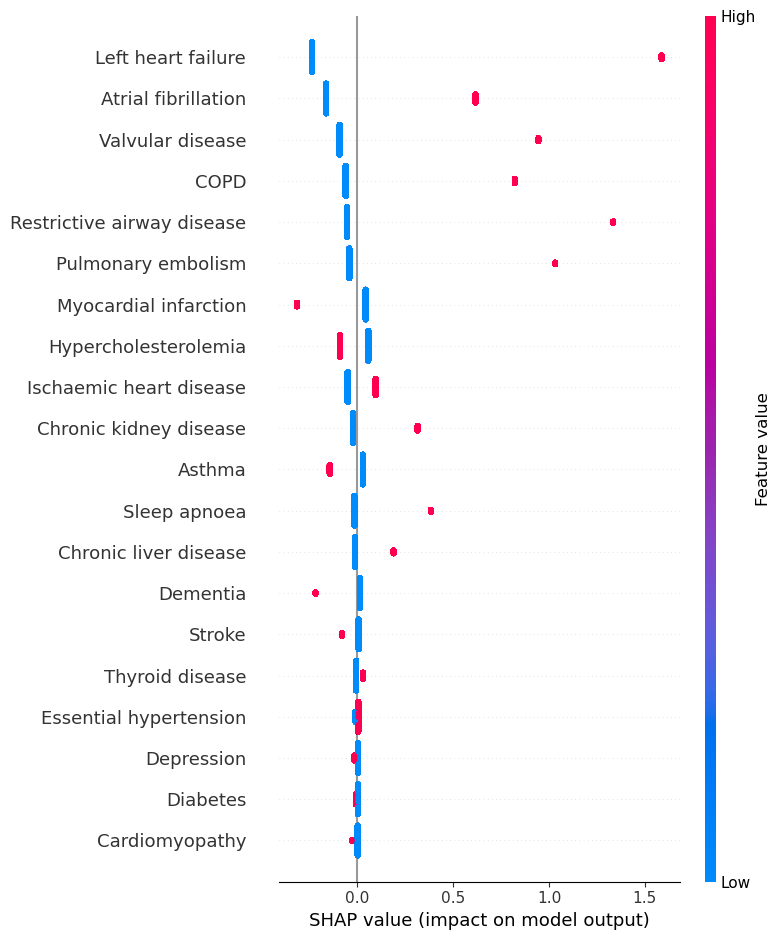

In [ ]:
from sklearn.linear_model import LogisticRegression
import shap

# Define features for the model
features = list(icd_patterns.keys())

if "PH" in features:
    features.remove("PH")


X_model = df_filtered[features]
y_model = df_filtered["PH"]

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_model, y_model)

# Use SHAP's explainer to interpret the model
explainer = shap.LinearExplainer(model, X_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_model)


# Plot SHAP summary for feature importance
shap.summary_plot(shap_values, X_model)

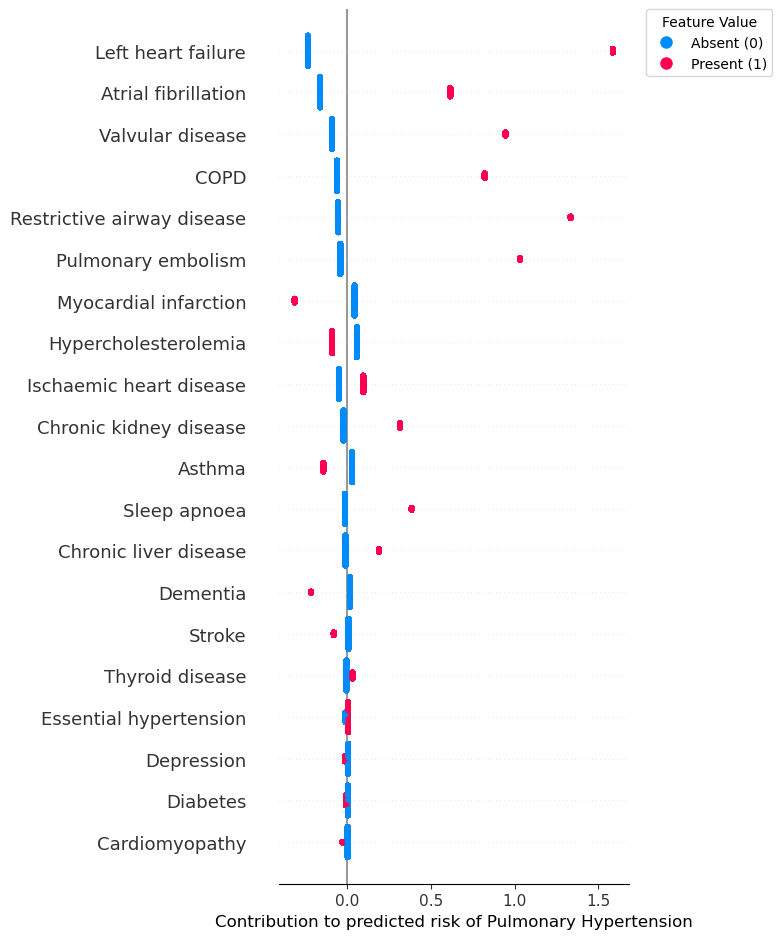

In [16]:
import shap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot the SHAP beeswarm (suppress color bar and auto-show)
shap.summary_plot(
    shap_values,
    X_model,
    color=shap_values,
    color_bar=False,
    show=False
)

# Define exact SHAP dot colors for binary values
color_absent = '#008bfb'   # Blue for 0
color_present = '#ff0051'  # Red for 1

# Custom binary legend using exact colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Absent (0)', markerfacecolor=color_absent, markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Present (1)', markerfacecolor=color_present, markersize=10)
]

# Position legend neatly outside
plt.legend(
    handles=legend_elements,
    title='Feature Value',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Update axis label
plt.xlabel("Contribution to predicted risk of Pulmonary Hypertension", fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
matched_df = pd.read_csv('Matched_Cohort.csv')

In [18]:
matched_df.head(10)

,Participant ID,Dementia,Depression,Stroke,Thyroid disease,Atrial fibrillation,Ischaemic heart disease,Left heart failure,Myocardial infarction,Valvular disease,...,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH,Sex,Age,Ethnicity,Disease Count
0,3263701,0,0,0,0,1,1,1,0,1,...,1,1,0,1,0,1,Female,85.0,British,7
1,5162291,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,Female,85.0,British,2
2,5850901,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,Male,71.0,British,4
3,1726911,1,0,0,1,1,1,1,0,0,...,0,1,1,1,1,1,Female,84.0,British,11
4,4521606,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,Male,76.0,British,4
5,4295543,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,Female,81.0,British,6
6,5126082,0,0,0,0,1,1,0,1,0,...,0,1,1,1,1,1,Female,67.0,Non-British,9
7,4153305,0,0,0,0,1,0,1,0,1,...,1,1,0,1,0,1,Male,67.0,British,6
8,3847505,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,Male,80.0,British,6
9,5636923,0,1,0,1,0,1,0,0,0,...,0,0,1,1,1,1,Female,80.0,British,6


In [19]:
from sklearn.preprocessing import LabelEncoder
matched_df['Sex'] = matched_df['Sex'].map({'Female': 0, 'Male': 1})
le = LabelEncoder()
matched_df['Ethnicity'] = le.fit_transform(matched_df['Ethnicity'])

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


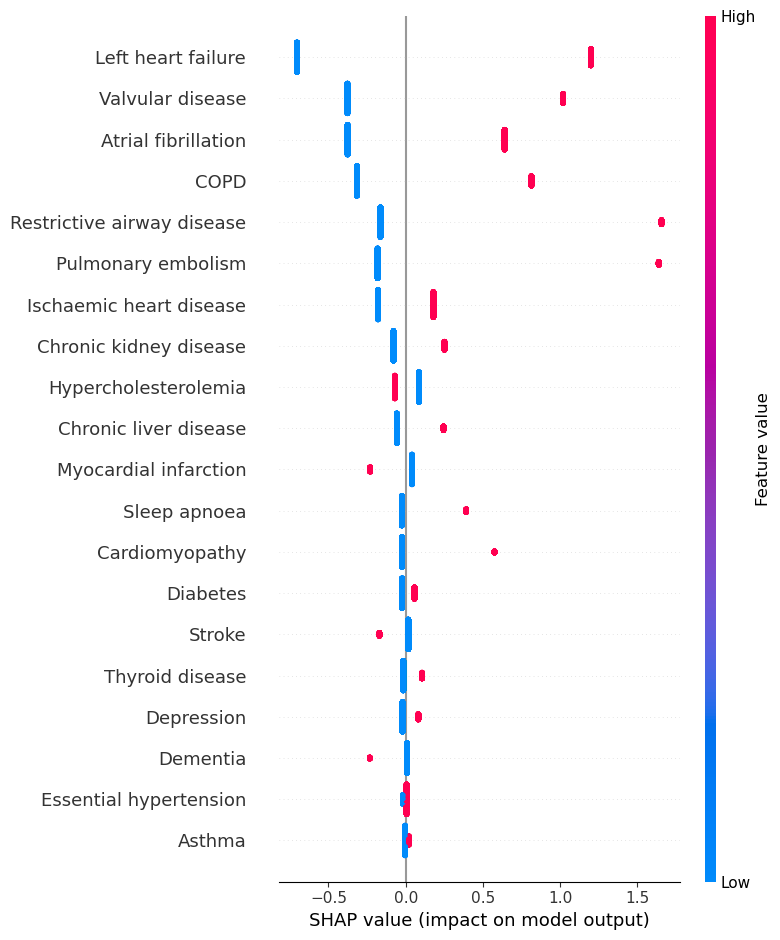

In [ ]:
from sklearn.linear_model import LogisticRegression
import shap

# Define features for the model
features = list(icd_patterns.keys())

if "PH" in features:
    features.remove("PH")


X_model = matched_df[features]
y_model = matched_df["PH"]

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_model, y_model)

# Use SHAP's explainer to interpret the model
explainer = shap.LinearExplainer(model, X_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_model)


# Plot SHAP summary for feature importance
shap.summary_plot(shap_values, X_model)

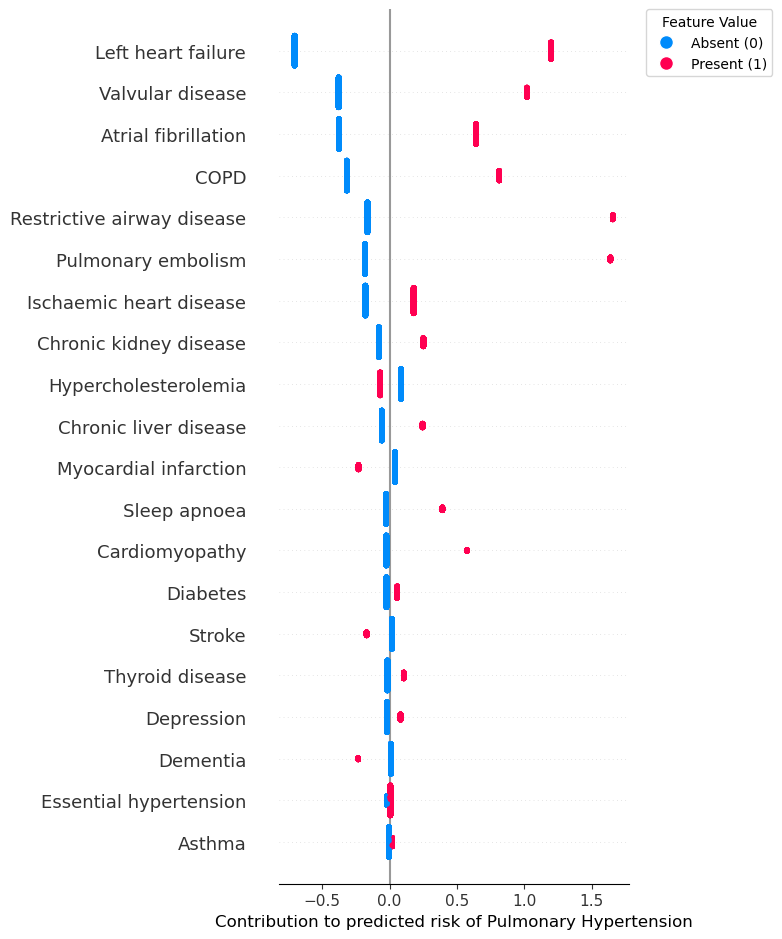

In [21]:
import shap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot the SHAP beeswarm (suppress color bar and auto-show)
shap.summary_plot(
    shap_values,
    X_model,
    color=shap_values,
    color_bar=False,
    show=False
)

# Define exact SHAP dot colors for binary values
color_absent = '#008bfb'   # Blue for 0
color_present = '#ff0051'  # Red for 1

# Custom binary legend using exact colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Absent (0)', markerfacecolor=color_absent, markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Present (1)', markerfacecolor=color_present, markersize=10)
]

# Position legend neatly outside
plt.legend(
    handles=legend_elements,
    title='Feature Value',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Update axis label
plt.xlabel("Contribution to predicted risk of Pulmonary Hypertension", fontsize=12)
plt.tight_layout()
plt.show()
